# Workbook 01 - End-to-End Machine Learning

by [Dr. David Elliott](https://eldave93.netlify.app/)

1. [Workspace Setup](#setup)

2. [Problem Understanding](#problem)

3. [Exploratory Data Analysis](#eda)

4. [Data Pre-Processing](#prep)

5. [Model Exploration](#explore)

6. [Model Refinement](#refine)

7. [Solution Presentation](#pres)

8. [Deployment](#deploy)

9. [Summary](#sum)

10. [Extra](#extra)

To kick start this series of workbooks we are going to walk through an end-to-end machine learning project! 

Don't worry about understanding all the specifics just yet, we'll be delving deeper into a lot of what is covered here later. Instead the aim here is to get a broad overview of how an ML project looks and to get some experience playing around with some of the techniques that we will learn more of in later workbooks.

You will find that in a lot of cases you won't need to write much code to answer the exercises (we're just getting started after all!), but there are some "extra" questions that require a bit more for those who want more of a stretch. Also as a lot of stuff will be new this week, there is a lot of written text here to help guide you along!

To engage with the workbook material, it is assumed that you have some knowledge of data manipulation and visualisation in Python from previous experience and courses.

This workbook will broadly use the CRoss Industry Standard Process for Data Mining (CRISP-DM) approach for our data science project. CRISP-DM is [most common process](https://www.datascience-pm.com/crisp-dm-still-most-popular/) for data mining, analytics, and data science projects (see [here](https://www.datascience-pm.com/crisp-dm-2/) fo details).

Indeed, a good general ["Machine Learning Project Checklist"](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md) from Geron (2019) can be used as a stucture:
> - Frame the problem and look at the big picture.
> - Get the data.
> - Explore the data and gain insights.
> - Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
> - Explore many different models and shortlist the best ones.
> - Fine-tune your models and combine them into a great solution.
> - Present your solution.
> - Launch, monitor, and mantain your system.

We will cover a number of them today.

# 1. Workspace Setup <a id='setup'></a>
Before downloading any data we should think about our workspace. It is assumed if you have made it this far you have already got your workspace setup. There are two ways of using these notebooks. The first is to use Google Colab, which is a website that allows you to write and execute python code through the browser. The second is a local workspace (e.g. Anaconda).

## 1.A. Google Colab
If you are using google colab then you can follow the below instructions to get setup.

First lets check if you are actually using google colab.

In [1]:
try:
    import google.colab
    COLAB=True
    
    # set the week code
    WORKSHOP_NAME = "01-end_to_end"
    # set the folder name
    FOLDER_NAME = "machine-learning-workbooks-main"
except:
    COLAB=False

If using colab we will first need to have the libaries for the runtime and files associated with this workbook uploaded to the temporary file store. The below code will do this for you.

In [2]:
if COLAB:
    import os
    import sys

    # check if the environment is already setup to avoid repeating this after 
    # restarting the runtime
    if not os.path.exists(FOLDER_NAME):
        # get the zip of the workbooks
        !wget https://github.com/Eldave93/machine-learning-workbooks/archive/refs/heads/main.zip
        # unzip the file
        !unzip main.zip
        # install the libaries
        !{sys.executable} -m pip install -r ./{FOLDER_NAME}/scripts/requirements.txt
          
    print("Setting working directory to:")
    %cd ./{FOLDER_NAME}/{WORKSHOP_NAME}

else:
    print("Colab is not being used")

Colab is not being used


As seen above, I automatically set the working directory to be a local version of the workshop repository. This is so all the data, images, and scripts for displaying the solutions works. This is located on the temporary file store associated with this colabs runtime. 

__Required:__ Now make sure to restart the runtime after installing to ensure everything works correctly (Runtime > Restart runtime).

## 1.1. Packages

If your using a local workspace you will need all the following packages to run this notebook. If you do not already have them, or you want to ensure you are using the same versions as used when created, you could run `!{sys.executable} -m pip install -r ../scripts/requirements.txt` to install them for you.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn
import sys

sys.path.append('../scripts') # add scripts to the path for use later
sns.set(rc={'figure.figsize': (14, 8)}) # For plot sizes

## 1.2. Displaying solutions

The solutions are activated using a new .txt file which can be put in the workbook folder (e.g. `01-end_to_end`). Please put in a request for access.

If you have access to the solutions, the following cell will create clickable buttons under each exercise, which will allow you to reveal the solutions.

__TODO__
- Add a way of pointing to a different folder

__Notes__

- This method was created by [Charlotte Desvages](https://charlottedesvages.com/).
- This may not work if you don't have the same version of `IPython.display` as the machine that created them:
    ```
    ImportError: cannot import name 'Code' from 'IPython.display' (/usr/local/lib/python3.7/dist-packages/IPython/display.py)
    ```
    If so run the auto-install as suggested above or manually run `!pip install ipython==7.20`.

In [4]:
%run ../scripts/create_widgets.py 01

Solutions .txt file not found!


---

# 2. Problem Understanding <a id='problem'></a>

Lets start by examining an example problem based on [previous research](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

You have been hired by a Portugese wine company that is looking to invest in new technologies for its wine making and selling processes. They are looking to make a _"vinho verde"_ (commonly a white or red wine) and are intested in developing models that can be used to improve their wine making (by identifying the most influential factors) and to stratify their wines (useful for setting prices). For the sake of this workbook we are going to focus on the latter problem, although you may want to come back to try tackle finding influential factors after doing some of the later workbooks.

From this description we have our objectives. At this stage, if working with a client on the project, we may want to discuss in broad terms some additional points. 

### 🚩 Exercise 1

Below write some questions you may want to ask your client.

In [5]:
%run ../scripts/show_solutions.py 01_ex1

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

## 2.1. Data Download
First we need to get our hands on some data. In this case we are going to use The Wine Quality dataset from the UCI website (https://archive.ics.uci.edu/ml/datasets/wine+quality). As this data comes from [previous research](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub) it is already in quite a nice state. In other cases there may be a number of other preparatory stages you may need to go through.

To download the data is straight-forward, we could just get it from the UCI website directly:

```
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
```

...or we can just read it from the "Data" folder I've included.

__Notes__
- I decided to use this dataset as its very popular. You can find 100's of notebooks online that work with this data so its a good one to get started and improve your skills with.

In [6]:
df_red = pd.read_csv("./Data/winequality-red.csv", 
                     delimiter=";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Hopefully by now you should have a pretty good idea what we consider as data. Data can come in a broad range of forms encompassing a collection of discrete objects, numbers, words, events, facts, measurements, observations, or even descriptions of things.

Lets start by looking at what variables we have in our data to work with.

In [7]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Below is a __Data Dictionary__ which describes what each feature represents. Have a read through but for the sake of this workbook you don't need to worry about understanding the precise details.

> - `fixed acidity`: It indicates the amount of tartaric acid in wine and is measured in g/dm$^3$.
> - `volatile acidity`: It indicates the amount of acetic acid in the wine. It is measured in g/dm3.
> - `citric acid`: It indicates the amount of citric acid in the wine. It is also measured in g/dm3.
> - `residual sugar`: It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in g/dm3.
> - `free sulfur dioxide`: It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3. 
> - `total sulfur dioxide`: It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.
> - `density`: It indicates the density of the wine and is measured in g/dm3.
> - `pH`: It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity. 
> - `sulphates`: It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.
> - `alcohol`: It indicates the alcohol content in the wine. 
> - `quality`: It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.

Mukhiya, S. K., & Ahmed, U. (2020). Hands-On Exploratory Data Analysis with Python.

So from the data we have, our aim is to create something that can take the attributes (`fixed acidity`...`alcohol`) and give us a prediction of the wine `quality`.

In [8]:
output = "quality"

To do this we need to learn from the data we have available to us (already labeled for quality) so in the future we can test lots of new formulations without needing to hire experts to grade the wine quality between 0 (very bad) and 10 (very excellent) to help us price it. So for example, say we have measured the following attributes from a new wine formulation:

In [9]:
# set the random seed so the same example is selected each time
np.random.seed(43)

# select a random wine example
example = df_red.sample()

# remove our `quality` attribute
X_example = example.drop(output, axis=1)

X_example

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
547,10.6,0.31,0.49,2.5,0.067,6.0,21.0,0.9987,3.26,0.86,10.7


The aim for this workbook is to create a model (e.g. `example_reg_pipe`) that we can input the above information in and make a prediction...

In [10]:
# this is just a bit of code I wrote to create a trained model
from helper_functions import create_example_model

# Don't worry about understanding this line of code - you will learn how to create your
# own `reg_pipe` without using `create_example_model` as this is just an example so you
# don't need to see the code that went into making this model yet.
example_reg_pipe = create_example_model(df_red.drop(example.index[0]), output)

# make a prediction with our model (rounded)
example_reg_pipe.predict(X_example).round()

array([6.])

So the model above has made a prediction that a wine with those attributes would be graded 6/10. Now because in this case we have had an expert grade this wine lets see how well our model did to predict the experts grading. What did the expert grade it as...

In [11]:
example.loc[:,output]

547    6
Name: quality, dtype: int64

Spot on, Well done model! It was able to predict what the wine expert would grade the wine without ever seeing this specific combination of attributes before.

Right now lets have a look at how we can make our own model to do this (essentially what I did inside the function `create_example_model`)!

---

# 3. Exploratory Data Analysis <a id='eda'></a>

In this section we are going to start with exploring the wine data.

Processing data using exploratory data analysis (EDA) can elicit useful information and knowledge by examining the available dataset to discover patterns, spot anomalies, test hypotheses, and check assumptions using statistical measures. 

However, before doing anything lets do something very important first - split our data into training and test sets. It is important to do it early on (before looking into the data too much) as we may end up focusing on specific patterns in our data which lead us to build/focus on models that do not work well on new data. If we do this, we will not have a good idea of how our model will perform in practice (generalisability). So we only want to work with our "training" data, and at the very end when we are happy with our model, have a look at its performance on the "test" data.

In [12]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_red,           # data to split
                                     test_size=0.2,    # we will leave 20% to test our models on later
                                     random_state=42,  # make our work reproducable 
                                     shuffle=True)     # prevent data ordering affecting our model

train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


As you can see above by the index and the code, this has shuffled our data first (`shuffle=True`) and then split our data into two sets. For the sake of later functions, we'll just reset the index so it runs from 0 to the length of the set.

__Note__
- This is to prevent problems caused by the wrong use of `.loc` or `.iloc`.

In [13]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


Now onto the tasks, where we will begin to get a basic understanding of the data. It is assumed you are already familiar with handling data (e.g. `pandas`, `numpy`), and visualisation (e.g. `seaborn`, `matplotlib`) in Python.

__Note__
- Remember to now use `train_df` when looking at the data and __not__ `df_red`!

---

### 🚩 Exercise 2

Examine the datatypes for each column of the `train_df` dataset.

- Do you need to make any changes to the data types?

In [14]:
%run ../scripts/show_solutions.py 01_ex2

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

### 🚩 Exercise 3

Get some descriptive information about the data (e.g. mean, standard deviation, etc.). 
- Is there anything in particular you notice in any of the variables that may warrent further examination?

In [15]:
%run ../scripts/show_solutions.py 01_ex3

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

Using the `output` string we made before (`output = "quality"`), we are going to split the data again. This time we are going to create a pandas `Series` called `y_train`, which contains our output variable (the thing we want to predict), and then remove this variable from our training `DataFrame` so that it only includes the attributes we want our model to learn from (`X_train`).

__Note__
- For visualisation purposes you may want to keep a version of the data (in this case `train_df`) with the target still in there.

In [16]:
y_train = train_df.loc[:,output]
X_train = train_df.drop(output, axis=1)
feature_names = list(X_train.columns)

print(X_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


---

### 🚩 Exercise 4

Use `sns.countplot` to examine how many unique values are present in `y_train` (the pandas Series with our output variable).

__Why might we want to do this?__

In a later workbook we will learn about the effects of "imballanced" data on models (where there is much more of one class than another). For now its just worth noting that your model will generally be better at predicting values that are the most common.

In [17]:
%run ../scripts/show_solutions.py 01_ex4

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

### 🚩 Exercise 5

Find out if any of the features from our training set (`X_train`) are highly correlated.

__Why might we want to do this?__
- For __Linear models__ (e.g. linear or logistic regression), multicolinearity can yield varying and possibly numerically unstable solutions.
- For __Random forests__ highly correlated features can mask feature interactions.
- For __Model interpretability__ a simpler model is generally preferable and more easily interpretable. 
- Generally...the learning algorithm will be __faster__ if we use this information to reduce the number of features.

You can look into the above more if you wish, but for now just take my word for it that its generally a good idea to identify highly correlated features and either remove one of them or (sometimes preferably) to combine them together with feature extraction techniques (e.g. PCA).

In [18]:
%run ../scripts/show_solutions.py 01_ex5

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

### 🚩 Exercise 6

Examine the distributions (e.g. gaussian, right or left skewed?) of the different variables.

__Why might we want to do this?__

Some models and preparation steps assume certain distributions.

<br>
<details><summary><b><u>Hint</b></u></summary>
    
You could use a histogram (e.g. `sns.histplot(df[variable])`), a probability plot (e.g. `scipy.stats.probplot(df[variable], dist="norm")`), or even compute the sample skewness (`scipy.stats.skew(df[variable])`).
    
</details>

In [19]:
%run ../scripts/show_solutions.py 01_ex6

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

# 4. Data Pre-Processing <a id='prep'></a>

Now we have some familiarity with the data though our data exploration, lets start preparing our data to be modelled.

---

## 4.1. Data Cleaning

At this stage in our workflow we may want to deal with duplicated/missing values and (optionally) fix/remove outliers. For now lets just look at the former issue.

### 4.1.1. Drop Duplicates

We want to remove duplicates as they may bias our fitted model. In other words, we may potentially *overfit* to this subset of points (we'll talk more about this in a later workbook). However, care should usually be taken to check they are not _real_ data with identical values.

There a number of ways we could identify duplicates, the simplist (and the approach we'll focus on) is just to find observations with all the same feature values. Of course this will not identify things such as spelling errors, missing values, address changes, use of aliases, ect. For those such things, more complicated methods along with manual assessment are needed.

---

### 🚩 Exercise 7

How many duplicated observations are present in the features?

<br>
<details><summary><b><u>Hint</b></u></summary>

- With Pandas dataframes you can use `.duplicated()` to get a boolean of whether something is a duplicate and then use `.sum()` to count how many there are.
</details>

In [20]:
%run ../scripts/show_solutions.py 01_ex7

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

To remove these duplicates from our training data we could combine our `X` and `y` training sets back together, use pandas `drop_duplicates` function, and split the data back up as so...

__Notes__
- In this case we need to combine them back together to ensure that we dont end up with less features in the `X` training data than the outputs.
- Notice how I use `_` after the steps below. This is just a naming convention I will use to denote a tempory object and avoid overwritting our original `X_train` and `y_train` objects. It may be tempting to overwrite `X_train` and `y_train` while working on our pre-processing steps. __Don't do this!__ We will run `X_train` and `y_train`  through multiple functions later, so when checking your code is working properly make sure to assign the output to tempory objects (e.g. `X_train_, y_train_`).

In [21]:
df_ = pd.concat([X_train, y_train], axis=1)
df_ = df_.drop_duplicates()

X_train_, y_train_ = df_.iloc[:,:-1], df_.iloc[:,-1]

However, we should really be turning each of our data transformation steps into functions or classes (therefore I assume you are familiar with how to make these). This is because when we want to run data through our "model pipeline" in the future, rather than having to copy and paste a load of code (which is prone to error), we can just use a series of functions. In this notebook, we will do this when training our model and seeing how it did on a separate test (or "validation") set, but this would also be required if you deploy your model in a "live" environment. Furthermore, when refining a model it makes it easier for us to treat our preparation choices as "parameters", meaning we can easily add or remove parts of our pipeline to see what works and what doesn't without having to copy and remove lots of code which could be prone to error.

So in the case above we can turn this into a function like so...

In [22]:
def drop_duplicated(X,y):
    df = pd.concat([X,y], axis=1)
    df = df.drop_duplicates()
    return df.iloc[:,:-1], df.iloc[:,-1]

X_train_, y_train_ = drop_duplicated(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_train_.shape)
print(y_train_.shape)

(1279, 11)
(1279,)
(1111, 11)
(1111,)


### 4.1.A. Pipelines and Scikit-learn

Its worth now taking a step back and examining what is meant by a "Pipeline". A general definition is that it is just a sequence of data preparation operations that is ensured to be reproducible. However, we may want to ensure that any functions/classes we make for our pipeline have specific attributes that work best with the tools available in our chosen machine learning library (`Scikit-learn`).

---

__Scikit-learn__

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. In Scikit-Learn a `Pipeline` is a class we can use to combine our pre-processing and modelling steps together (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Objects that go into a scikit-learn `Pipeline` can either be [_transformer_](https://scikit-learn.org/stable/data_transforms.html#dataset-transformations) or [_estimator_](https://scikit-learn.org/stable/developers/develop.html#estimators) classes, or, if we use an imbalanced-learn `Pipeline` instead, also a _resampler_.

---

Learning to use pipelines can be a little more tricky at first but its better practice than not using them so its worth trying! It will prevent you from making common mistakes. If you don't want to use them then thats fine, but be careful to check you are not "bleeding" information from your training set into your validation or test sets (more on this later). In otherwords, make sure your models cannot peak or get any idea what is in these separate datasets we use to check how they perform!

If we want to remove duplicate _observations_ from our training data using a function that is compatible with a `Pipeline`, we are going to need to turn it into a _resampler_.

---

__Resamplers__

Resamplers are classes that follow the scikit-learn API and have a sampling functionality through the `.resample()` method.

Like all other scikit-learn methods (e.g. _transformers_ and _estimators_), they have a `.fit()` method which is only applied during pipeline training, which is used to...
- ...validate and interpret any parameters, 
- ...validate the input data, 
- ...estimate and store attributes from the parameters and provided data, 
- ...return the fitted object to facilitate method chaining in a pipeline. 

Along with other sample properties (e.g. `sample_weight`), the `.fit()` method usually takes 2 inputs:

> - The samples matrix (or design matrix) X. The size of X is typically (n_samples, n_features), which means that samples are represented as rows and features are represented as columns.
>
> - The target values y which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. y is usually 1d array where the ith entry corresponds to the target of the i th sample (row) of X.
>
> https://scikit-learn.org/stable/getting_started.html

Other methods available for these objects other than `.fit()` will depend on what they are, so we will look at each of these objects in turn and then combine them into a model pipeline later in this workbook.

If we want to create our own resampler from scratch that is compatible with scikit-learn, we have to make a class that has two methods; `.fit()` and `.fit_resample()` (see https://imbalanced-learn.org/dev/references/generated/imblearn.FunctionSampler.html). If we want to resample a dataset, we just need to use the latter method:

```
data_resampled, targets_resampled = obj.fit_resample(data, targets)
```

You can look at making custom pipeline functions in the next (optional) notebook, but for now we can just wrap our `drop_duplicated` function we just made in the handy `FunctionSampler` from `imblearn` to make the function we made before compatible.

__Notes__
- `imblearn` needs to be installed for the following to work.
- Typically your functions can output a `pd.DataFrame` or a `np.Array` to be put into a pipeline, however generally you should try work with numpy arrays. This is because although a pandas dataframe can be used as an input to scikit-learn objects, they will typically output NumPy arrays or SciPy sparse matrices (this is quite a sensible design choice as explained [here](https://arxiv.org/abs/1309.0238)). If you want to chain your methods together, then working with numpy arrays generally make it easier (although there are exceptions!). It is however worth noting that _"Unlike scikit-learn, imbalanced-learn provides support for pandas in/out. Therefore providing a dataframe, will output as well a dataframe"_<sup>1</sup>.
- Technically a sampler is intended to be used to "sample" data, but it is useful in this case as samplers fundamentally are used to reduce or increase the number of samples (observations) in both our feature data (`X_train`) and our targets (`y_train`) data which we need to do in this cleaning step.

1. https://imbalanced-learn.org/stable/introduction.html


In [23]:
from imblearn import FunctionSampler

duplicated_sampler = FunctionSampler(func=drop_duplicated,    # our custom function
                                     validate=False)          # prevents both inputs being changed to numpy arrays

---

### 🚩 Exercise 8

__TODO__
- update exercise numebrs

Using `.fit_resample`, check to see if the `duplicated_sampler` reduces the number of observations in the training data.

__Note__
- Make sure to not overwrite your training data!

In [24]:
%run ../scripts/show_solutions.py 01_ex8

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

### 4.1.2. Missing Values

Now we have checked for duplicates, lets do another important data cleaning step and check for missing values.

__Why might we want to do this?__

Most models (including all models in scikit-learn) cannot handle missing data.

### 🚩 Exercise 9

Are there any missing values in the training data? 
- Can you think of any options we would have to account for them?

In [25]:
%run ../scripts/show_solutions.py 01_ex9

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

### 🚩 Exercise 10 (extra)

Create a `Pipeline` compatible resampler that could remove any NA values from the data.

<br />
<details><summary><b><u>Hint</b></u></summary>
    
It will be very similar to using the other resampler above except using `.dropna()`.
</details>

In [26]:
%run ../scripts/show_solutions.py 01_ex10

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

## 4.2. Feature Selection

This optional step can occour at many points during our ML pipeline development, but this time lets do it now. Feature selection is typically used to drop attributes that provide no useful information for the task. It is part of __Dimension Reduction__ (alongside feature extraction).

We could create our own feature selection "transformer" functions/classes from scratch (see next workbook), however for the sake of this workbook lets just use ones already available to us already in `scikit-learn` or that I have pre-made.

For this notebook lets add a basic feature selection technique into our pipeline: dropping any feature that is highly correlated with another feature (we looked at correlated features in a previous exercise).

In [27]:
from helper_functions import DropCorrelatedFeatures

Below I've included some documentation (in the style of Scikit-Learn) for how we can use this class.

---

### DropCorrelatedFeatures
> _class_ DropCorrelatedFeatures(_method='pearson', threshold=0.5_)

Finds and removes correlated variables from a numpy array or DataFrame.

Features are removed on first found first removed basis without any further insight. This means it will keep the feature which has a lower column index and drop the feature that is correlated over a given threshold that has a larger index.

<table>
  <tr>
    <td><strong>Parameters</strong></td>
    <td style="text-align:left">
        <strong><code>method</code>: <em>string default='pearson'</em></strong> <br> 
        Method of correlation:
        <ul>
          <li>'pearson': standard correlation coefficient;</li>
          <li>'kendall': Kendall Tau correlation coefficient;</li>
          <li>'spearman': Spearman rank correlation.</li>
        </ul>
     </td>
  </tr>
  <tr>
    <td></td>
    <td style="text-align:left">
        <strong><code>threshold</code>: <em>float default=0.8</em></strong> <br>
        The correlation threshold above which a feature will be deemed correlated with another one and removed from the dataset.
    </td>
  </tr>
  <tr>
    <td><strong>Attributes</strong></td>
    <td style="text-align:left">
        <strong><code>correlated_feature_sets_</code>: <em>ndarray of shape (n_correlated, 2)</em></strong> <br>
        Group of correlated features.
    </td>
  </tr>
  <tr>
    <td></td>
    <td style="text-align:left">
        <strong><code>features_to_drop_</code>: <em>ndarray of shape (n_features, )</em></strong> <br>
       Set with the correlated features that will be dropped.
    </td>
  </tr>
</table>

__Methods__

<table>
  <tr>
    <td><strong>fit(X, [,y])</strong></td>
    <td style="text-align:left">
        Compute the features that will be dropped.
     </td>
  </tr>
  <tr>
    <td><strong>fit_transform(X, [,y])</strong></td>
    <td style="text-align:left">
        Fit to data, then transform it.
     </td>
  </tr>
  <tr>
    <td><strong>transform(X, [,y])</strong></td>
    <td style="text-align:left">
        Remove features that are over the threshold.
     </td>
  </tr>
</table>

> fit(_X, y=None_)

    Compute the features that will be dropped.

<table>
  <tr>
    <td><strong>Parameters</strong></td>
    <td style="text-align:left">
        <strong>X: <em>{array-like, sparse matrix} of shape (n_samples, n_features)</em></strong> <br> 
        The data used to compute the features that will be dropped.
     </td>
  </tr>
  <tr>
    <td></td>
    <td style="text-align:left">
        <strong>y: <em>None</em></strong> <br>
        Ignored.
    </td>
  </tr>
  <tr>
    <td><strong>Returns</strong></td>
    <td style="text-align:left">
        <strong>self: <em>object</em></strong> <br>
        Fitted transformer
    </td>
  </tr>
</table>

> fit_transform(_X, y=None_, **fit_params)

    Fit to data, then transform it.

    Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

<table>
  <tr>
    <td><strong>Parameters</strong></td>
    <td style="text-align:left">
        <strong>X: <em>{array-like, sparse matrix} of shape (n_samples, n_features)</em></strong> <br> 
        The data used to compute the features that will be dropped.
     </td>
  </tr>
  <tr>
    <td></td>
    <td style="text-align:left">
        <strong>y: <em>None</em></strong> <br>
        Ignored.
    </td>
  </tr>
  <tr>
    <td></td>
    <td style="text-align:left">
        <strong>**fit_params: <em>dict</em></strong> <br>
        Additional fit parameters.
    </td>
  </tr>
  <tr>
    <td><strong>Returns</strong></td>
    <td style="text-align:left">
        <strong>X_new: <em>{array-like, sparse matrix} of shape (n_samples, n_features)</em></strong> <br>
        Transformed array or dataframe.
    </td>
  </tr>
</table>


> transform(_X_)

    Remove features that are over the threshold.

<table>
  <tr>
    <td><strong>Parameters</strong></td>
    <td style="text-align:left">
        <strong>X: <em>{array-like, sparse matrix} of shape (n_samples, n_features)</em></strong> <br> 
        The data used to remove the features.
     </td>
  </tr>
  <tr>
    <td><strong>Returns</strong></td>
    <td style="text-align:left">
        <strong>X_tr: <em>{array-like, sparse matrix} of shape (n_samples, n_features)</em></strong> <br>
        Transformed array.
    </td>
  </tr>
</table>

---

__Transformers__

The above class is an example of a _"Transformer"_. Transformers in Scikit-Learn [clean](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing), [reduce](https://scikit-learn.org/stable/modules/unsupervised_reduction.html#data-reduction), [expand](https://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation), or [generate](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction) feature representations.

Transformers are classes with a `.fit()` method, which learn model parameters (e.g. mean and standard deviation for normalization) from a training set, and a `.transform()` method which applies this transformation model to data<sup>1</sup>. To create a custom transformer, all you need is to create a class that implements three methods: `fit()`, `transform()`, and `fit_transform()`.

Therefore to transform a dataset, each sampler implements:

```
obj.fit(data)
data_transformed = obj.transform(data)
```

or simply...

```
data_transformed = obj.fit_transform(data)
```

__Note__
- dropping correlated features is not a _"sampler"_ as as feature selection reduces the number of _features_ (not observations!) in our data, meaning we don't need to change our _target_ data (y).
- There are also a bunch of relevent pre-made transformers available to us already in `scikit-learn` and `feature_engine`.
- Some transformers (especially those outside of the core scikit-learn library) may require a certain type of object. For examle a lot of the ones I have pre-made are based on transformers from the `feature_engine` package. When using `feature_engine`, they want pandas DataFrames as an input. However those in the core scikit-learn library generally accept both pandas DataFrames and numpy arrays.

1. https://scikit-learn.org/stable/data_transforms.html

---

### 🚩 Exercise 11

Using the `DropCorrelatedFeatures` class I have pre-made and detailed above (based on `feature_engine.selection`), drop any features that are correlated above a 0.6 theshold.
- Print out the features that were dropped (`.dropped_`).
- Examine which features were dropped (`.correlated_feature_sets_`).

__Notes__
- A 0.6 threshold may be a bit low, but used here for demonstration purposes.

<details><summary><b><u>Hints</b></u></summary>

- Instead of using `.fit_resample()`, we will now need to use `.fit_transform()`.

</details>

In [28]:
%run ../scripts/show_solutions.py 01_ex11

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

## 4.3. Feature Engineering

Feature engineering means formulating appropriate features given the data, the model, and the task. Typically we use domain knowledge to aid in the selection and transformation of the most relevant variables from raw data when creating a predictive model.

---

### 🚩 Exercise 12

Would feature engineering require a _"resampler"_ or a _"transformer"_ class?

In [29]:
%run ../scripts/show_solutions.py 01_ex12

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

For this week lets look at log transforming our features so that they have a more gaussian distribution (this may improve the performance of models we will use later). Log transformations are useful for altering the data to have a more normal distribution as they pull in the more extreme high values relative to the median, while stretching back extreme low values away from the median.

__Notes__
- Below we are using `np.log1p` instead of `np.log` to stop any errors that result from transforming data with a 0 in it as you cannot log transform 0.

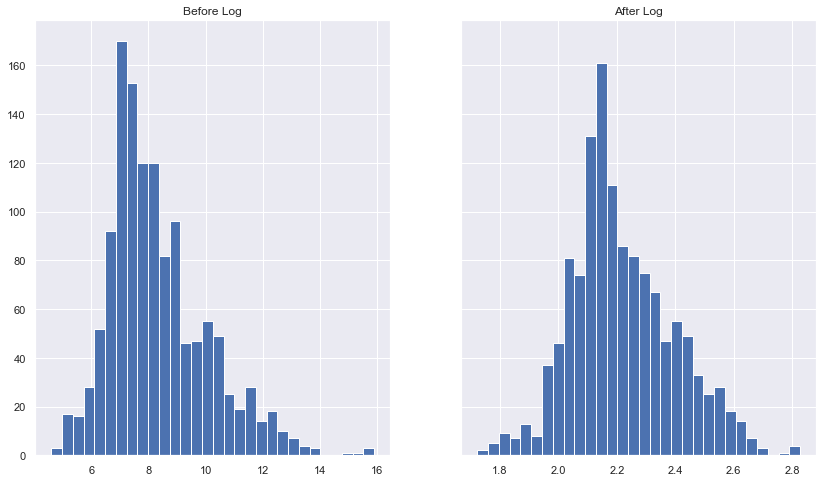

In [30]:
variable_name = "fixed acidity" # for our example
X_train_ = X_train.copy()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
X_train_[variable_name].hist(bins=30, ax=ax1)
ax1.set_title("Before Log")

X_train_[variable_name] = np.log1p(X_train_[variable_name]) # log transform data
X_train_[variable_name].hist(bins=30, ax=ax2)
ax2.set_title("After Log")

plt.show()

---

### 🚩 Exercise 13

Examine the effect of this transformation on other variables.

In [31]:
%run ../scripts/show_solutions.py 01_ex13

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

However as we discussed before, its probably a better idea to turn our data preproccessing/cleaning/transformation steps into functions/classes.

---

### 🚩 Exercise 14 (Extra)

Using the conversation function `sklearn.preprocessing.FunctionTransformer` and `np.log1p`, make a transformer that transforms our features using a log transform (remember we looked at identifying features with skewed distributions in a previous exercise). 

<br />
<details><summary><b><u>Hint</b></u></summary>
    
`np.log1p` is already a function so you can put it straight into a `FunctionTransformer` without problem.
</details>

In [32]:
from sklearn.preprocessing import FunctionTransformer



In [33]:
%run ../scripts/show_solutions.py 01_ex14

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

## 4.4. Feature Scaling

Many machine learning algorithms are sensitive to the scale and magnitude of the features.

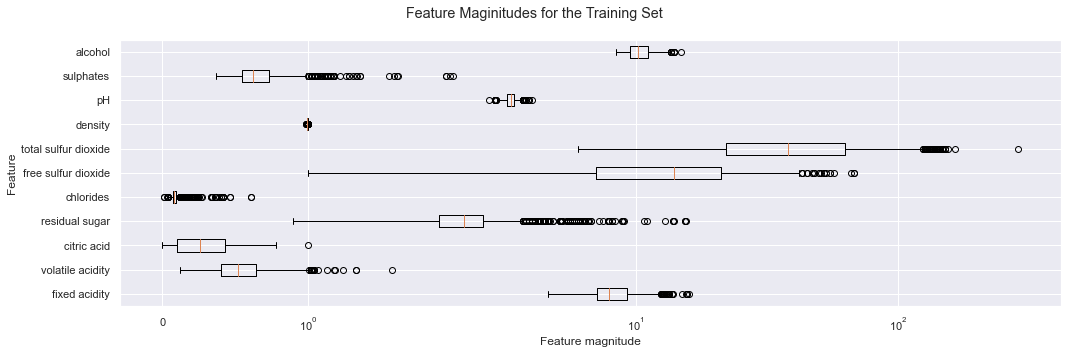

In [34]:
def plot_scales(data, names):

    fig, ax = plt.subplots(figsize=(15,5))

    plt.boxplot(data, vert=False) 
    plt.xscale("symlog") 
    plt.ylabel("Feature") 
    plt.xlabel("Feature magnitude")

    ax.set_yticklabels(feature_names)

    plt.suptitle("Feature Maginitudes for the Training Set")
    plt.tight_layout()
    plt.show()
    
plot_scales(X_train, feature_names)

As you can see above, each feature in our dataset is measured on quite different scales. 

To improve performance and training times for certain machine learning models, we can "standardise" our features by centering the variable (by removing the mean of each feature from each observation) and standardizing to unit variance (1). In order to do this we subtract the mean from each observation and then divide the result by the standard deviation:

$$z=\frac{x-mean(x)}{std(x)}.$$

The result of the preceding transformation is called the *z-score* and represents how many standard deviations a given observation deviates from the mean<sup>1</sup>.

1. Galli, S. (2020). Python Feature Engineering Cookbook.

---

### 🚩 Exercise 15

Using the `StandardScaler` transformer from `sklearn.preprocessing`, scale the features (`X_train`).

You can use...
- ...`.mean_` on the scaler object find the mean of the features before scaling.
- ...`.scale_` find the standard deviation value of the features before scaling.

You can check that it has worked by using the `plot_scales` function above.

In [35]:
from sklearn.preprocessing import StandardScaler


In [36]:
%run ../scripts/show_solutions.py 01_ex15

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

### 🚩 Exercise 16 (Extra)

Using the handy conversation function `sklearn.preprocessing.FunctionTransformer`, make transformer that standardises our data. 

In [37]:
%run ../scripts/show_solutions.py 01_ex16

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

# 5. Model Exploration <a id='explore'></a>

Now you would explore a series of models from different machine learning categories (e.g. linear, non-linear, forests, neural networks). For this workbook we are only going to check a few models on their default parameters.

Before moving on we are going to split our data again into a training and validation set. We do this because later we want to get an idea of how different pre-processing steps and models will perform on data it was not trained on. If we did this with our test set, we'd be tweeking our model to get better and better on this set and probably start to overfit to the specifics of this set (therefore its no longer a good measure of generalisation performance). Instead we are going to split our training data again and see how different models affect a validation set. We can use this validation set to guide pipeline changes with the comfort of knowing that when it comes time to assess our pipeline on our test set, that will give us a representative of generalisation performance as we'll only look at it right at the end.

__Note__
- Leaving your models on default parameters is generally a bad idea, but we'll do it for now until we understand the models more!
- If your data is huge, you could subsample your training set here as well while checking different pre-processing and model steps (although this may penalize more complex models). 

In [38]:
# Lets keep a copy for if we want them later
X_train_full, y_train_full = X_train.copy(), y_train.copy()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, # data to split
                                                  test_size=0.2,    # we will leave 20% to test our models on later
                                                  random_state=42,  # make our work reproducable 
                                                  shuffle=True)     # prevent data ordering affecting our model
# reset the index so it goes from 0...n
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

---

__Estimators__

Models in scikit-learn are _estimator_ classes. Like resamplers and transformers before them, estimators also have a `.fit()`. However, once the estimator is fitted, it can be used for predicting target values of new data using `.predict()`. This means you don’t need to re-train the estimator each time you want to make a prediction.

Therefore to model and predict values of a dataset, each  _estimator_ implements:

```
obj.fit(data, target)
data_predictions = obj.predict(data)
```

or simply...

```
data_predictions = obj.fit_predict(data)
```

---

## 5.1. Regression

Lets start with regression, which we will look at more in the next notebook. We'll start by just fitting a basic linear regression model using `sklearn`.

In [39]:
# To build our model, we first need to import it. 
from sklearn.linear_model import LinearRegression

# create an instance of the model
reg = LinearRegression()

# feed it some data so it can try and learn what the pattern is
reg.fit(X_train, y_train)

LinearRegression()

Great, now lets assess its performance. In a later workbook we'll learn lots of different metrics (and learn its important to use more than just 1!), but for now we will just use $R^2$ which is the default.

__What is $R^2$?__

Without worrying about the details to much yet, it is a measure of the proportion of the variance in the dependent variable (or "output") that is predictable from the independent variables (or "features")...and is the default scoring method for regression models in scikit-learn.

__What is considered a good score?__

Well it depends on the data but... 
- ...a value of 1.0, means our model is perfectly fitting our data. 
- ...a value of 0.5 would mean that 50% of the variability in the outcome data is explained by the model.
- ...a value of 0.2 would mean that 20% of the variability in the outcome data is explained by the model.
- ...etc.

We could of course fit our model, make predictions, and calculate the $R^2$ ourselves... or we could just use the `.score()` method. Lets start by having a look at how it did modelling our training data.

In [40]:
round(reg.score(X_train, y_train), 3)

0.359

So we can explain 36% of the datas variability using this model. 

__Is that good or bad?__

Well it depends on what performance required for the project and the context for the data/model. A high or low R-square isn't necessarily good or bad, as it doesn't convey the reliability of the model, nor whether you've chosen the right regression. You can get a low R-squared for a good model, or a high R-square for a poorly fitted model, and vice versa. What qualifies as a "good" R-Squared value will depend on the context - you would want to have a look at other similar models on similar data, as well as other metrics, to get a better idea here. A low value of $R^2$ just indicates that the dependent variable is affected by a host of other factors in addition to the ones considered in the analysis.

Even with all this said, I bet you still want context... okay so here are some suggestions (but take them VERY loosely):

> 1) Falk and Miller (1992) recommended that R2 values should be equal to or greater than 0.10 in order for the variance explained of a particular endogenous construct to be deemed adequate.
>
> 2) Cohen (1988) suggested R2 values for endogenous latent variables are assessed as follows: 0.26 (substantial), 0.13 (moderate), 0.02 (weak).
>
> 3) Chin (1998) recommended R2 values for endogenous latent variables based on: 0.67 (substantial), 0.33 (moderate), 0.19 (weak).
>
> 4) Hair et al. (2011) & Hair et al. (2013) suggested in scholarly research that focuses on marketing issues, R2 values of 0.75, 0.50, or 0.25 for endogenous latent variables can, as a rough rule of thumb, be respectively described as substantial, moderate or weak.

_Fung, Han Ping. (2015). Re: What is a good r square value in regression analysis?. Retrieved from: https://www.researchgate.net/post/what_is_a_good_r_square_value_in_regression_analysis/5527fb76f079eddf718b45bc/citation/download._

---

So 36% seems okay. Now another thing we can do is compare its performance on the training set to the performance on the validation set to get an idea of its "generalisation performance".

__Note__
- If you get a different result than above you may have already altered the training data with pre-processing steps - don't do this yet as this is a task in a minute...

In [41]:
round(reg.score(X_val, y_val), 3)

0.268

However in the validation set we can only explain 27% of the datas variability using this model. This suggests our model is better at modelling our training data than our validation data. This is common and would mean we should try tweek our model to reduce the difference between the training and validation performance.

---
We haven't used our pre-processing steps yet before feeding the data to the model! Lets remind ourselves of what our pre-processing steps are and then chain them together in a `Pipeline`.

__Note__
- If you've been doing the extra exercises some of the code below should be familiar. If not don't worry about it too much, we're just making sure our functions play nicely in a `Pipeline`.
- If you do not have `imblearn` installed you will need to remove `from imblearn.pipeline import Pipeline` and use `from sklearn.pipeline import Pipeline` instead. You also cannot use the sampler `DD`.

In [42]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config
set_config(display='diagram')

# remove duplicated values - returns a pandas dataframe as this
# is needed for DropCorrelatedFeatures.
def drop_duplicated(X,y):
    df = pd.concat([X,y], axis=1)
    df = df.drop_duplicates()
    return df.iloc[:,:-1], df.iloc[:,-1]

DD = FunctionSampler(func=drop_duplicated,
                      validate=False)

# drops correlated features
fs = DropCorrelatedFeatures(threshold=0.6)

# log transforms all variables
lt = FunctionTransformer(np.log1p)

# standardises all variables
scaler = StandardScaler() 

# here is the model we want to use.
reg = LinearRegression()

# create our pipeline for the data to go through.
# This is a list of tuples with a name (useful later) and the function.
reg_pipe = Pipeline([
    ("drop_duplicated", DD),
    ("feature_selection", fs),
    ("log_transformer", lt),
    ("scaler", scaler),
    ("model", reg)
])

reg_pipe

Pipeline(steps=[('drop_duplicated',
                 FunctionSampler(func=<function drop_duplicated at 0x0000023897E03790>,
                                 validate=False)),
                ('feature_selection', DropCorrelatedFeatures(threshold=0.6)),
                ('log_transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

Lets see if this has improved performance?

In [43]:
reg_pipe.fit(X_train, y_train)

print("Training Score")
print(round(reg_pipe.score(X_train, y_train), 3))
print("Validation Score")
print(round(reg_pipe.score(X_val, y_val), 3))

Training Score
0.35
Validation Score
0.273


...Okay so in this case not really. But we may be able to improve the pipeline by changing its parameters later. Maybe we don't need all these steps, or maybe there are better models to use? 

Before looking at other regression models, its always a good idea to get an idea of what "baseline" performance looks like. Imagining our client has not told us, lets just use a "dummy" model, which does absolutely no learning (it just predicts the training data mean for everything).

---

### 🚩 Exercise 17

Fit a `DummyRegressor` (from `sklearn.dummy`), to the training data and assess its $R^2$ on the training and validation sets. 

- How does it compare to the `LinearRegression` model? 

In [44]:
from sklearn.dummy import DummyRegressor


In [45]:
%run ../scripts/show_solutions.py 01_ex17

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

### 🚩 Exercise 18

See if other regression models can be used to improve performance.

__a)__ Create a `pipeline` with `PolynomialFeatures(include_bias=False)` inbetween the `"log_transformer"` and `"scaler"`.

__Note__
- `PolynomialFeatures()` enables our regression model to capture "non-linear" relationships between our variables (we'll look at this more later).
- `include_bias=False` just stops the function adding a bias column as our `LinearRegression` object is going to add one for us anyway.

In [46]:
from sklearn.preprocessing import PolynomialFeatures



In [47]:
%run ../scripts/show_solutions.py 01_ex18a

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

__b)__ Create a different `pipeline` with `DecisionTreeRegressor()` used instead of the `LinearRegression` model.

__Note__
- This time you don't want to have `PolynomialFeatures()`.

In [48]:
from sklearn.tree import DecisionTreeRegressor



In [49]:
%run ../scripts/show_solutions.py 01_ex18b

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

__c)__ How do these models compare to the standard `LinearRegression` pipeline according to their $R^2$ performance?

In [50]:
%run ../scripts/show_solutions.py 01_ex18c

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
You may be thinking, well I could have done all that without bothering with making sure my functions were compatible with a `Pipeline`. There are two main reasons why I suggest using them:

__Ensures Information Bleed Prevention__

If we did all our preprocessing steps before splitting the data into training and validation steps, we would bleed information from our validation set for training the models. For example, we scaled our features which requires us taking a mean and standard deviation of the data we'll train our model on. If these means and standard deviations include the data we will use for validation they may very slightly improve our result and then when we later make predictions on the test set we may find performance is slightly worse than expected as we truely did not use any information from that set! Over time these small amounts of information bleed may add up and mean our validation set is no longer as useful assessing how our model performs on other data.

So did this effect us because we did pre-processing steps before splitting our data? Nope because we use pipleines. When we used `.fit(X_train, y_train)` as above, this overwrites the parameters of the pre-processing steps and the model so we can be assured this only reflects information from this set. Sure you could go step by step using `.fit_transform()` on your data and passing the output to the next function, but this would not be as simple as putting them all in a `Pipeline`. Another way round would be to split your data into training and validation sets before pre-processing your data to stop you needing to re-fit your pre-processing steps later. This would work, but using a `Pipeline` works well with other validation methods too (so saves us some additional coding)...

__Works well with Different Validation Methods__

Heres where `Pipelines` really start to get useful (and we'll see more extensions later). So far we've used the `train_test_split` function to split the training set into a smaller training set and a validation set, which we have used to validate our models. This works well, but by partitioning the available data into three sets, we reduce the number of samples that can be used for learning the model, and the results depend on the random choice of the pair of (train, validation) sets. A great alternative is therefore to use Scikit-Learn’s _K-fold cross-validation_ feature. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.

![Cross-validation](./Images/grid_search_cross_validation.png)

When doing k-fold cross-validation, the training set is split into $k$ smaller sets and:

- A model is trained using $k-1$ of the folds as training data.

- The resulting model is validated on the remaining part of the data.

The performance measure reported by k-fold cross-validation is therefore the average of the values computed in the loop. Although more computationally expensive than a single split, it does not waste too much data (particuarly useful when the number of samples is very small) and gives us more robust assessment of performance. Again, using a `Pipeline` with this method will ensure there is no information bleed between our different folds.

Lets have a look how we could evaluate our initial linear regression pipeline below with them.

__Note__
- You can use `cross_val_score` if you just want the validation score.
- Note `cross_validate` calls the validation performance the `test_score`, to be clear this is the validation performance and should not be used as "test"! This is why I rename it in the `tidy_scores` function below.

In [51]:
from sklearn.model_selection import cross_validate

# tidy the output into a dataframe
def tidy_scores(score_dict):
    df = pd.DataFrame(score_dict)
    df.loc['mean'] = df.mean()
    df.loc['sd'] = df.std()
    df.rename({"test_score":"val_score"}, axis=1, inplace=True)
    df.index.name = "fold"
    return df.round(2)

scores = cross_validate(reg_pipe, X_train_full, y_train_full, cv=5, return_train_score=True)
tidy_scores(scores)

,fit_time,score_time,val_score,train_score
fold,,,,
0,0.01,0.0,0.24,0.36
1,0.01,0.0,0.29,0.35
2,0.01,0.0,0.28,0.35
3,0.01,0.0,0.34,0.34
4,0.01,0.0,0.44,0.31
mean,0.01,0.0,0.32,0.34
sd,0.00,0.0,0.07,0.01


---

### 🚩 Exercise 19

Assess the performance of the other regression pipelines made above (the one with `PolynomialFeatures(include_bias=False)` and the other with a `DecisionTreeRegressor`) using `cross_validate`. 
- Do these results change your intepretation of the best model pipeline?

In [52]:
%run ../scripts/show_solutions.py 01_ex19

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---

At this point you would normally begin to examine how the fitted models are working and what are the most most useful variables for each algorithm. Investigating this may give you a deeper insight into the data and inform another quick round of feature selection and engineering. However, for now we are just going to skip this until we learn more about the models.

---

## 6. Model Refinement <a id='refine'></a>

Now you will want to fine-tune your models. Normally you would select a couple of models which are making different errors to examine in more detail but for the sake of this workbook we are just going to look at the best regression (Linear Regression) model.

To fine tune your model you want to change your models "parameters". At the moment we have mostly been using each model on their default settings ("hyperparameters"), but most have stuff we can change. However, as we haven't explained any of these models yet we are going to leave these on default. Instead we are going to try improve model performance by changing our data transformations.

---

### 🚩 Exercise 20

Remove and/or change some of the pre-processing steps to see if you can improve the "best" model performance*. Here are some things you can try:
- Remove the duplicated observations/feature selection/transformer/scaling step from the pipeline.
- Change the `threshold` for the `DropCorrelatedFeatures`.

__Notes__
- Instead of deleting or hashing out a pipeline step you want to skip, you can specify the name string as `"passthrough"` or set the resampler/transformer/estimator to `None`. This is useful later in the course when we get onto using automated methods to refine our models.

*_At the moment we are going to do this all manually, but you can automate this process using a `gridsearch` or `randomsearch` which will be discussed in a future workbook._

In [53]:
%run ../scripts/show_solutions.py 01_ex20

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
## 7. Solution Presentation <a id='pres'></a>

Now with your models are complete you would present your findings in a report worded appropriately for the intended stakeholder. At this step is where you may improve your visualisations and present your findings in an interesting way.

Part of this is getting a final assessment of the generalisation performance for your final models to present (what the test set is for). The reason we leave it so late is because it is important that you do not tweak your model after doing this as this will mean that you would just start to overfit to your test set! Overfitting is the reason at this point that your model may perform better on the training and validation sets than the test set.

---

### 🚩 Exercise 21

Measure the performance of your chosen model pipeline on the _test set_. 
- How did it perform? 
- Was it about what you expected?

__Note__
- Make sure to training your model on ALL the available training data, not just the smaller training data that had a the validation set taken off it, as now you don't need the validation data to check any further changes.

In [54]:
%run ../scripts/show_solutions.py 01_ex21

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
## 8. Deployment <a id='deploy'></a>

It maybe that your model is going to be adopted into practice. At this point, depending on your skills, you may work with an engineer to get your code production ready (e.g. impliment unit tests, performance and input monitoring, retraining schedules), or just do it yourself.

In this case you can provide your client a model that when they input properties of a wine it predicts the "quality" of the wine. This could be used to help guide the clients on how to price the wine.

To provide the model, there are a few ways. A simple way is just to using either `joblib` or `pickle`. Here I will demonstrate joblib...

In [56]:
import joblib
import os

modelPath = os.path.join(os.path.curdir, "Model", "reg_pipe.pkl")
joblib.dump(reg_pipe, modelPath)

['.\\Model\\reg_pipe.pkl']

If you check the `Model` folder, you should now see the file there. If we want to load the model, we just need to call the filename...

In [57]:
reg_pipe=joblib.load(modelPath)
reg_pipe

Pipeline(steps=[('drop_duplicated',
                 FunctionSampler(func=<function drop_duplicated at 0x0000023897E03790>,
                                 validate=False)),
                ('feature_selection', DropCorrelatedFeatures(threshold=0.6)),
                ('log_transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

Saving our models in this way allows us to transfer them between different users.

---
# 9. Summary <a id='sum'></a>

For the sake of this workbook you are now done - well done! 

Hopefully you feel we have addressed the aim of getting an overview of how a typical machine learning project looks like.

This workbook we worked through a number of the steps required as part of a machine learning project. We were introduced to scikit-learn and specifically how to use a `pipeline` to string multiple steps together. It may seem like unnecessary extra work, but as we introduce more complex methods, they will become incredibly useful and save time.

---

# 10. Extra Exercises <a id='extra'></a>

## Classification

Lets change the output variable to a binary output (0 or 1) and have a look at some classification models.

__Note__
- You may be wondering if you could turn this into a function and add this into a `Pipeline` using the `FunctionSampler`. As far as I can tell you can't because samplers are _only_ applied when fitting (training) the model, and not when making predictions. We need our labels to be changed in this binary way for both fitting the model and making predictions - so we do this before putting it though our pipeline.

In [53]:
replace_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1, 10:1}

y_train_ = y_train.replace(replace_dict)
y_val_ = y_val.replace(replace_dict)

display(y_train.value_counts().sort_index())
display(y_train_.value_counts())

3      9
4     33
5    426
6    413
7    131
8     11
Name: quality, dtype: int64

0    881
1    142
Name: quality, dtype: int64

We still have "imballanced" data which will likely affect our model performance... but lets not worry about that for now.

---

### 🚩 Exercise 22 (Extra)

Using the following pipeline workflow (`"drop_duplicated"`, `"feature_selection"`, `"log_transformer"`, `"scaler"`, `"model"`), assess the training and validation set performance of the following models (on their default settings):
- `DummyClassifier`
- `LogisticRegression`
- `LinearSVC`
- `KNeighborsClassifier`

__Note__
- Using the `.score()` method on classification models defaults to "Accuracy". 
    - Put simply, Accuracy is just: correct predictions / total predictions * 100.0. 
    - Like `R^2` in regression, we want this to be high (close to 1). 
    - Like regression we will examine classification performance metrics in much more detail over the rest of the course.

In [54]:
%run ../scripts/show_solutions.py 01_ex22

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
### 🚩 Exercise 23 (Extra)

Remove and/or change some of the pre-processing steps to see if you can improve both the "best" classification model performance.

---

### 🚩 Exercise 24 (Extra)

If you are feeling extra keen then why not do the above again with the white wine dataset. Are your results similar or different? Maybe you want to come back to this after learning a bit more on the course. Its entirely up to you.

In [55]:
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                       delimiter=";")